In [317]:
# Import libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import statistics
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [318]:
train_df = pd.read_csv('./data/processed_table.csv')
test_df = pd.read_csv('./data/processed_table_7244.csv')
combine = [train_df, test_df]

In [319]:
train_df = train_df.drop('Unnamed: 0',  axis = 1)
test_df = test_df.drop('Unnamed: 0',  axis = 1)
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25645 entries, 0 to 25644
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   donorID                 25645 non-null  int64  
 1   province                25645 non-null  object 
 2   region                  25645 non-null  object 
 3   gender                  25645 non-null  object 
 4   language                25645 non-null  object 
 5   number_of_campaigns     25644 non-null  float64
 6   total_amount            25644 non-null  float64
 7   Q1_Donations            13953 non-null  float64
 8   Q2_Donations            13337 non-null  float64
 9   Q3_Donations            10980 non-null  float64
 10  Q4_Donations            13061 non-null  float64
 11  days_since_contributed  25644 non-null  float64
 12  mean                    25644 non-null  float64
 13  min                     25644 non-null  float64
 14  max                     25644 non-null

In [320]:
print(train_df.columns.values)

['donorID' 'province' 'region' 'gender' 'language' 'number_of_campaigns'
 'total_amount' 'Q1_Donations' 'Q2_Donations' 'Q3_Donations'
 'Q4_Donations' 'days_since_contributed' 'mean' 'min' 'max' 'Q1_Mean'
 'Q2_Mean' 'Q3_Mean' 'Q4_Mean' 'Q1_Min' 'Q2_Min' 'Q3_Min' 'Q4_Min'
 'Q1_Amount' 'Q2_Amount' 'Q3_Amount' 'Q4_Amount' 'Q1_Max' 'Q2_Max'
 'Q3_Max' 'Q4_Max' 'age' 'age-group' 'amount' 'has_contributed']


# Variable classification
- Categorical: 'province' 'region' 'gender'  'has_contributed' 'language'. 
Ordinal: age-group
Continuous: age, 'number_of_campaigns','total_amount', 'Q1_Donations','Q2_Donations', 'Q3_Donations','Q4_Donations','days_since_contributed','mean','min','max','Q1_Mean','Q2_Mean','Q3_Mean','Q4_Mean','Q1_Min','Q2_Min','Q3_Min','Q4_Min','Q1_Amount','Q2_Amount','Q3_Amount','Q4_Amount','Q1_Max','Q2_Max','Q3_Max','Q4_Max' 

In [321]:
np.set_printoptions(threshold=sys.maxsize)

### Checking data for inconsistencies

In [322]:
for column in train_df[0:]:
    print(column)
    print(train_df[column].unique())

donorID
[100001 100002 100004 100008 100009 100010 100011 100012 100013 100014
 100016 100017 100018 100019 100021 100022 100023 100024 100025 100026
 100028 100029 100031 100032 100034 100035 100036 100037 100039 100040
 100041 100042 100043 100045 100046 100048 100051 100052 100053 100055
 100056 100058 100060 100061 100062 100063 100064 100065 100066 100068
 100070 100073 100074 100075 100076 100077 100079 100081 100082 100083
 100084 100086 100087 100089 100090 100091 100092 100093 100094 100095
 100096 100097 100099 100100 100101 100102 100103 100104 100105 100106
 100107 100108 100110 100111 100112 100113 100114 100115 100116 100117
 100118 100119 100120 100121 100124 100125 100126 100127 100129 100130
 100131 100133 100134 100136 100137 100138 100139 100141 100142 100143
 100144 100145 100146 100147 100149 100150 100151 100152 100154 100155
 100158 100159 100160 100161 100162 100166 100167 100168 100169 100170
 100171 100172 100173 100174 100175 100176 100177 100178 100179 10018

In [323]:
train_df['province'] =  np.where(train_df['province'] == 'ANTWERP', 'Antwerp', train_df['province'])

train_df[train_df['province'] == 'ANTWERP']

## Since NA values are numerical filling it with 0
#train_df = train_df.fillna(0)

,donorID,province,region,gender,language,number_of_campaigns,total_amount,Q1_Donations,Q2_Donations,Q3_Donations,...,Q3_Amount,Q4_Amount,Q1_Max,Q2_Max,Q3_Max,Q4_Max,age,age-group,amount,has_contributed


In [324]:
train_df.isna().sum()

donorID                       0
province                      0
region                        0
gender                        0
language                      0
number_of_campaigns           5
total_amount                  5
Q1_Donations              16105
Q2_Donations              16188
Q3_Donations              20919
Q4_Donations              17298
days_since_contributed        5
mean                          5
min                           5
max                           5
Q1_Mean                   16105
Q2_Mean                   16188
Q3_Mean                   20919
Q4_Mean                   17298
Q1_Min                    16105
Q2_Min                    16188
Q3_Min                    20919
Q4_Min                    17298
Q1_Amount                 16105
Q2_Amount                 16188
Q3_Amount                 20919
Q4_Amount                 17298
Q1_Max                    16105
Q2_Max                    16188
Q3_Max                    20919
Q4_Max                    17298
age     

In [325]:
test_df['province'] =  np.where(test_df['province'] == 'ANTWERP', 'Antwerp', test_df['province'])

test_df[test_df['province'] == 'ANTWERP']
## Since NA values are numerical filling it with 0
#test_df = test_df.fillna(0)

,donorID,province,region,gender,language,number_of_campaigns,total_amount,Q1_Donations,Q2_Donations,Q3_Donations,...,Q3_Mean,Q4_Mean,Q1_Max,Q2_Max,Q3_Max,Q4_Max,age,age-group,amount,has_contributed


In [326]:
test_df.isna().sum()

donorID                       0
province                      0
region                        0
gender                        0
language                      0
number_of_campaigns           1
total_amount                  1
Q1_Donations              11692
Q2_Donations              12308
Q3_Donations              14665
Q4_Donations              12584
days_since_contributed        1
mean                          1
min                           1
max                           1
Q1_Min                    11692
Q2_Min                    12308
Q3_Min                    14665
Q4_Min                    12584
Q1_Amount                 11692
Q2_Amount                 12308
Q3_Amount                 14665
Q4_Amount                 12584
Q1_Mean                   11692
Q2_Mean                   12308
Q3_Mean                   14665
Q4_Mean                   12584
Q1_Max                    11692
Q2_Max                    12308
Q3_Max                    14665
Q4_Max                    12584
age     

In [327]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34874 entries, 0 to 34873
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   donorID                 34874 non-null  int64  
 1   province                34874 non-null  object 
 2   region                  34874 non-null  object 
 3   gender                  34874 non-null  object 
 4   language                34874 non-null  object 
 5   number_of_campaigns     34869 non-null  float64
 6   total_amount            34869 non-null  float64
 7   Q1_Donations            18769 non-null  float64
 8   Q2_Donations            18686 non-null  float64
 9   Q3_Donations            13955 non-null  float64
 10  Q4_Donations            17576 non-null  float64
 11  days_since_contributed  34869 non-null  float64
 12  mean                    34869 non-null  float64
 13  min                     34869 non-null  float64
 14  max                     34869 non-null

In [328]:
print(train_df.describe())

             donorID  number_of_campaigns  total_amount  Q1_Donations  \
count   34874.000000         34869.000000  3.486900e+04  18769.000000   
mean   120984.568446             4.228799  2.985607e+02      1.981725   
std     12219.440990             7.892280  2.520205e+04      2.641425   
min    100001.000000             1.000000  5.000000e+00      1.000000   
25%    110457.250000             1.000000  2.479000e+01      1.000000   
50%    120743.500000             2.000000  4.000000e+01      1.000000   
75%    131403.250000             4.000000  1.100000e+02      2.000000   
max    144691.000000           238.000000  4.000030e+06    134.000000   

       Q2_Donations  Q3_Donations  Q4_Donations  days_since_contributed  \
count  18686.000000  13955.000000  17576.000000            34869.000000   
mean       2.284652      2.161161      2.128414             2493.911956   
std        2.989509      3.032107      3.700780             1103.383693   
min        1.000000      1.000000      1.0

In [329]:
train_df.describe(include=['O'])

,province,region,gender,language
count,34874,34874,34874,34874
unique,12,4,3,3
top,Antwerp,Flanders,M,NL
freq,8341,32007,20654,31878


### Droping amount column as it has lot of na columns, for rest of columns with na filling them with 0

In [330]:
train_df = train_df.drop('amount',  axis = 1)
test_df = test_df.drop('amount',  axis = 1)

In [331]:
train_df =  train_df.fillna(0)
test_df =  test_df.fillna(0)

In [332]:
encoder = LabelEncoder()
p_value =  {}
for column in train_df.columns[1:]:
    print(column)
    df = train_df[column]
    if train_df[column].dtype == object:
        df = encoder.fit_transform(train_df[column])
    
    p_value[column] = stats.pearsonr(df, train_df.has_contributed)

province
region
gender
language
number_of_campaigns
total_amount
Q1_Donations
Q2_Donations
Q3_Donations
Q4_Donations
days_since_contributed
mean
min
max
Q1_Mean
Q2_Mean
Q3_Mean
Q4_Mean
Q1_Min
Q2_Min
Q3_Min
Q4_Min
Q1_Amount
Q2_Amount
Q3_Amount
Q4_Amount
Q1_Max
Q2_Max
Q3_Max
Q4_Max
age
age-group
has_contributed


In [333]:
#variables that have a p-value lower than 0.001
selected_feature =  ['donorID' , 'has_contributed']
for key in p_value.keys():
    if p_value[key][0] < 0.001:
        selected_feature.append(key)

print(selected_feature)



['donorID', 'has_contributed', 'region', 'gender', 'total_amount', 'days_since_contributed', 'mean', 'min', 'max', 'Q2_Mean', 'Q4_Mean', 'Q2_Min', 'Q4_Min', 'Q2_Amount', 'Q4_Amount', 'Q2_Max', 'Q4_Max']


In [334]:
#We would be further evaluating selected columns
# train_df =  train_df[selected_feature]
# train_df.head()

In [335]:
# train_df.info()

In [336]:
#We would be further evaluating selected columns
# test_df =  test_df[selected_feature]
# test_df.head()

In [337]:
# test_df.info()

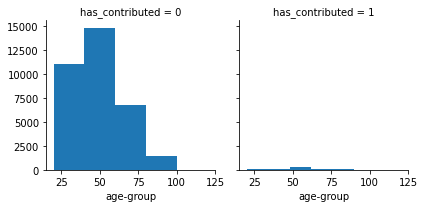

In [338]:
g = sns.FacetGrid(train_df, col='has_contributed')
g.map(plt.hist, 'age-group', bins=5)

In [339]:
train_df = train_df.drop(train_df[train_df['age'] == 129].index)

In [340]:
train_df['age-band'] = pd.qcut(train_df['age'], 4)
train_df[['age-band', 'has_contributed']].groupby(['age-band'], as_index=False).mean().sort_values(by='age-band', ascending=True)

,age-band,has_contributed
0,"(19.999, 36.0]",0.009993
1,"(36.0, 47.0]",0.013680
2,"(47.0, 59.0]",0.018471
3,"(59.0, 99.0]",0.042677


In [341]:
for column in train_df.columns[1:]:
    columnname = column + "_band"
    print(columnname)
    if train_df[column].dtype == int:
        train_df[columnname] = pd.qcut(train_df[column], 4, duplicates = 'drop')
        train_df[[columnname, 'has_contributed']].groupby([columnname], as_index=False).mean().sort_values(by=columnname, ascending=True)   
    elif train_df[column].dtype == float:
        train_df[columnname] = pd.qcut(train_df[column], 4, duplicates = 'drop')
        train_df[[columnname, 'has_contributed']].groupby([columnname], as_index=False).mean().sort_values(by=columnname, ascending=True) 


province_band
region_band
gender_band
language_band
number_of_campaigns_band
total_amount_band
Q1_Donations_band
Q2_Donations_band
Q3_Donations_band
Q4_Donations_band
days_since_contributed_band
mean_band
min_band
max_band
Q1_Mean_band
Q2_Mean_band
Q3_Mean_band
Q4_Mean_band
Q1_Min_band
Q2_Min_band
Q3_Min_band
Q4_Min_band
Q1_Amount_band
Q2_Amount_band
Q3_Amount_band
Q4_Amount_band
Q1_Max_band
Q2_Max_band
Q3_Max_band
Q4_Max_band
age_band
age-group_band
has_contributed_band
age-band_band


In [342]:
train_df

,donorID,province,region,gender,language,number_of_campaigns,total_amount,Q1_Donations,Q2_Donations,Q3_Donations,...,Q3_Min_band,Q4_Min_band,Q1_Amount_band,Q2_Amount_band,Q3_Amount_band,Q4_Amount_band,Q1_Max_band,Q2_Max_band,Q3_Max_band,Q4_Max_band
0,100001,Flemish Brabant,Flanders,F,NL,12.0,178.49,3.0,3.0,1.0,...,"(-0.001, 20.0]","(2.48, 24.79]","(31.6, 5000.0]","(34.71, 4000000.0]","(-0.001, 27.52]","(30.0, 2479000.0]","(5.0, 30.0]","(6.2, 30.0]","(-0.001, 24.79]","(4.96, 25.0]"
1,100002,Antwerp,Flanders,M,NL,1.0,20.00,1.0,0.0,0.0,...,"(-0.001, 20.0]","(-0.001, 2.48]","(6.2, 31.6]","(-0.001, 9.92]","(-0.001, 27.52]","(-0.001, 4.96]","(5.0, 30.0]","(-0.001, 6.2]","(-0.001, 24.79]","(-0.001, 4.96]"
2,100004,Brussels,Brussels,F,FR,26.0,716.22,8.0,4.0,4.0,...,"(20.0, 30000.0]","(2.48, 24.79]","(31.6, 5000.0]","(34.71, 4000000.0]","(27.52, 30000.0]","(30.0, 2479000.0]","(5.0, 30.0]","(6.2, 30.0]","(-0.001, 24.79]","(25.0, 2479000.0]"
3,100008,Flemish Brabant,Flanders,M,FR,3.0,124.37,0.0,1.0,0.0,...,"(-0.001, 20.0]","(2.48, 24.79]","(-0.001, 6.2]","(34.71, 4000000.0]","(-0.001, 27.52]","(30.0, 2479000.0]","(-0.001, 5.0]","(30.0, 4000000.0]","(-0.001, 24.79]","(25.0, 2479000.0]"
4,100009,Brussels,Brussels,M,FR,19.0,326.78,5.0,4.0,4.0,...,"(-0.001, 20.0]","(2.48, 24.79]","(31.6, 5000.0]","(34.71, 4000000.0]","(27.52, 30000.0]","(30.0, 2479000.0]","(5.0, 30.0]","(6.2, 30.0]","(24.79, 30000.0]","(4.96, 25.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,144686,Antwerp,Flanders,F,NL,1.0,50.00,0.0,1.0,0.0,...,"(-0.001, 20.0]","(-0.001, 2.48]","(-0.001, 6.2]","(34.71, 4000000.0]","(-0.001, 27.52]","(-0.001, 4.96]","(-0.001, 5.0]","(30.0, 4000000.0]","(-0.001, 24.79]","(-0.001, 4.96]"
34870,144687,Liege,Wallonia,M,FR,1.0,10.00,0.0,0.0,0.0,...,"(-0.001, 20.0]","(2.48, 24.79]","(-0.001, 6.2]","(-0.001, 9.92]","(-0.001, 27.52]","(4.96, 30.0]","(-0.001, 5.0]","(-0.001, 6.2]","(-0.001, 24.79]","(4.96, 25.0]"
34871,144689,Flemish Brabant,Flanders,M,NL,2.0,124.79,0.0,1.0,1.0,...,"(20.0, 30000.0]","(-0.001, 2.48]","(-0.001, 6.2]","(34.71, 4000000.0]","(-0.001, 27.52]","(-0.001, 4.96]","(-0.001, 5.0]","(30.0, 4000000.0]","(-0.001, 24.79]","(-0.001, 4.96]"
34872,144690,Flemish Brabant,Flanders,M,FR,1.0,40.00,0.0,0.0,0.0,...,"(-0.001, 20.0]","(24.79, 2479000.0]","(-0.001, 6.2]","(-0.001, 9.92]","(-0.001, 27.52]","(30.0, 2479000.0]","(-0.001, 5.0]","(-0.001, 6.2]","(-0.001, 24.79]","(25.0, 2479000.0]"


In [343]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34873 entries, 0 to 34873
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   donorID                      34873 non-null  int64   
 1   province                     34873 non-null  object  
 2   region                       34873 non-null  object  
 3   gender                       34873 non-null  object  
 4   language                     34873 non-null  object  
 5   number_of_campaigns          34873 non-null  float64 
 6   total_amount                 34873 non-null  float64 
 7   Q1_Donations                 34873 non-null  float64 
 8   Q2_Donations                 34873 non-null  float64 
 9   Q3_Donations                 34873 non-null  float64 
 10  Q4_Donations                 34873 non-null  float64 
 11  days_since_contributed       34873 non-null  float64 
 12  mean                         34873 non-null  float64 
 13  m

In [345]:
encoder = LabelEncoder()
p_value =  {}
for column in train_df.columns[1:]:
    print(column)
    df = train_df[column]

    if train_df[column].dtype == object or train_df[column].dtype.name == 'category':
        train_df[column] = encoder.fit_transform(train_df[column])
    
    p_value[column] = stats.pearsonr(train_df[column], train_df.has_contributed)

province
region
gender
language
number_of_campaigns
total_amount
Q1_Donations
Q2_Donations
Q3_Donations
Q4_Donations
days_since_contributed
mean
min
max
Q1_Mean
Q2_Mean
Q3_Mean
Q4_Mean
Q1_Min
Q2_Min
Q3_Min
Q4_Min
Q1_Amount
Q2_Amount
Q3_Amount
Q4_Amount
Q1_Max
Q2_Max
Q3_Max
Q4_Max
age
age-group
has_contributed
age-band
number_of_campaigns_band
total_amount_band
Q1_Donations_band
Q2_Donations_band
Q3_Donations_band
Q4_Donations_band
days_since_contributed_band
mean_band
min_band
max_band
Q1_Mean_band
Q2_Mean_band
Q3_Mean_band
Q4_Mean_band
Q1_Min_band
Q2_Min_band
Q3_Min_band
Q4_Min_band
Q1_Amount_band
Q2_Amount_band
Q3_Amount_band
Q4_Amount_band
Q1_Max_band
Q2_Max_band
Q3_Max_band
Q4_Max_band


In [346]:
#variables that have a p-value lower than 0.05
selected_feature =  ['donorID' , 'has_contributed']
for key in p_value.keys():
    if p_value[key][0] < 0.01:
        selected_feature.append(key)

print(selected_feature)

['donorID', 'has_contributed', 'province', 'region', 'gender', 'number_of_campaigns', 'total_amount', 'Q1_Donations', 'Q2_Donations', 'Q3_Donations', 'Q4_Donations', 'days_since_contributed', 'mean', 'min', 'max', 'Q2_Mean', 'Q3_Mean', 'Q4_Mean', 'Q2_Min', 'Q3_Min', 'Q4_Min', 'Q2_Amount', 'Q4_Amount', 'Q2_Max', 'Q3_Max', 'Q4_Max', 'Q4_Donations_band', 'days_since_contributed_band']


In [ ]:
len(selected_feature)

28

In [353]:
from scipy.stats          import pearsonr

selectedFeatures = ['donorID' , 'has_contributed']
target = "has_contributed"

for column in train_df.columns:
    if column not in ('donorID', 'has_contributed'):
        (pearson,pvalue) = pearsonr(train_df[column],train_df[target])
        print(f"{column} - p-vlue = {pvalue} - selected : {1 if pvalue < 0.001 else 0}")
        if pvalue < 0.001:
            selectedFeatures.append(column)

        

province - p-vlue = 0.7219073087449103 - selected : 0
region - p-vlue = 0.16305184952175583 - selected : 0
gender - p-vlue = 2.931577971479507e-78 - selected : 1
language - p-vlue = 0.010937705585736092 - selected : 0
number_of_campaigns - p-vlue = 0.2655368680977106 - selected : 0
total_amount - p-vlue = 0.8888838983768956 - selected : 0
Q1_Donations - p-vlue = 0.3440544116613206 - selected : 0
Q2_Donations - p-vlue = 0.3077988512976184 - selected : 0
Q3_Donations - p-vlue = 0.14167905675476272 - selected : 0
Q4_Donations - p-vlue = 0.7260631866250493 - selected : 0
days_since_contributed - p-vlue = 0.00012231977221764795 - selected : 1
mean - p-vlue = 0.8485170006895744 - selected : 0
min - p-vlue = 0.8964657687542114 - selected : 0
max - p-vlue = 0.8488637591983863 - selected : 0
Q1_Mean - p-vlue = 1.9015792905998302e-05 - selected : 1
Q2_Mean - p-vlue = 0.8890742946060599 - selected : 0
Q3_Mean - p-vlue = 0.3848196653212075 - selected : 0
Q4_Mean - p-vlue = 0.8956595814867626 - sel

In [354]:
selectedFeatures

['gender',
 'days_since_contributed',
 'Q1_Mean',
 'Q1_Min',
 'Q1_Amount',
 'Q1_Max',
 'age',
 'age-group',
 'age-band',
 'number_of_campaigns_band',
 'total_amount_band',
 'days_since_contributed_band',
 'mean_band',
 'min_band',
 'max_band',
 'Q1_Mean_band',
 'Q2_Mean_band',
 'Q3_Mean_band',
 'Q4_Mean_band',
 'Q1_Min_band',
 'Q2_Min_band',
 'Q3_Min_band',
 'Q4_Min_band',
 'Q1_Amount_band',
 'Q2_Amount_band',
 'Q3_Amount_band',
 'Q4_Amount_band',
 'Q1_Max_band',
 'Q2_Max_band',
 'Q3_Max_band',
 'Q4_Max_band']

In [ ]:
drop_column = ['days_since_contributed', 'Q1_Mean', 'Q1_Min', 'Q1_Amount', 'Q1_Max', 'age','age-group']
for column in drop_column:
    selectedFeatures.remove(column)

In [ ]:
train_df =  train_df[selectedFeatures]
X_train = train_df.drop("has_contributed", axis=1)
Y_train = train_df["has_contributed"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape